In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
# exploring categoric data
grouped = dataset.groupby(['Aparencia']).size()
grouped

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

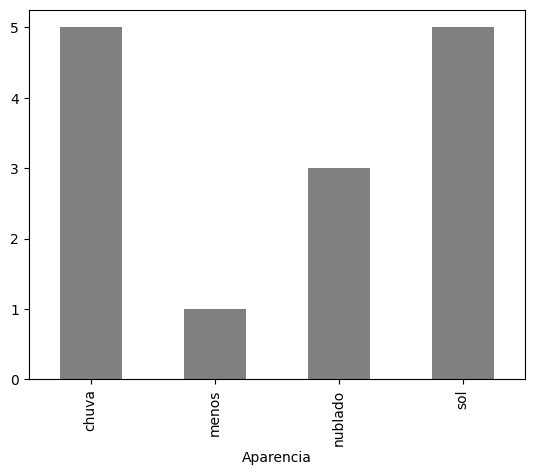

In [4]:
grouped.plot.bar(color='gray')

In [5]:
# wind
grouped = dataset.groupby(['Vento']).size()
grouped

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [6]:
# play
grouped = dataset.groupby(['Jogar']).size()
grouped

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

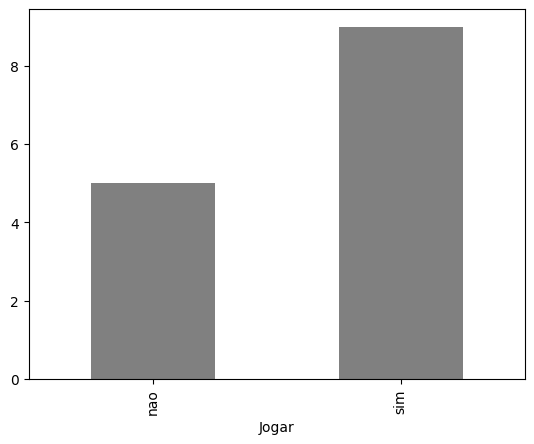

In [7]:
grouped.plot.bar(color="gray")

In [8]:
# exploring numeric columns
# temperature
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

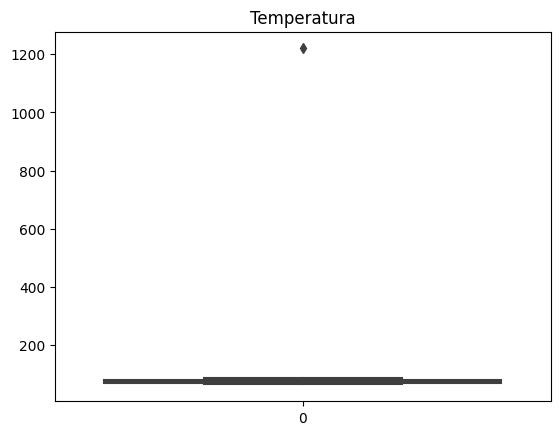

In [9]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

In [10]:
# moisture
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

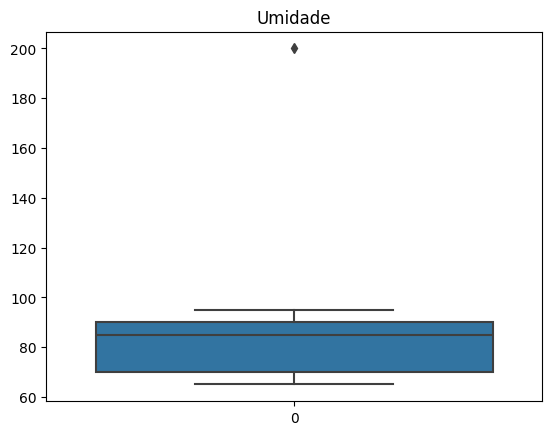

In [11]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

In [12]:
# couting NAN values
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [13]:
# invalid data for 'Aparencia'
grouped = dataset.groupby(['Aparencia']).size()
grouped

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [14]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

grouped = dataset.groupby(['Aparencia']).size()
grouped

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [15]:
# temperature out of domain
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [16]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [17]:
# median temperature
median = sts.median(dataset['Temperatura'])
median

73.5

In [ ]:
# replacing
dataset.loc[(dataset['Temperatura'] < -130) |
            (dataset['Temperatura'] > 130), 'Temperatura'] = median

In [19]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [20]:
# moisture
grouped = dataset.groupby(['Umidade']).size()
grouped

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [21]:
# NAs total
dataset['Umidade'].isnull().sum()

1

In [22]:
median = sts.median(dataset['Umidade'])
median

85.5

In [23]:
dataset['Umidade'].fillna(median, inplace=True)

In [24]:
dataset['Umidade'].isnull().sum()

0

In [25]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [26]:
dataset.loc[(dataset['Umidade'] < 0) | (
    dataset['Umidade'] > 100), 'Umidade'] = median

In [27]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [28]:
# winds
grouped = dataset.groupby(['Vento']).size()
grouped

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [29]:
dataset['Vento'].isnull().sum()

1

In [30]:
dataset['Vento'].fillna('FALSO', inplace=True)

In [31]:
dataset['Vento'].isnull().sum()

0